# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [191]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [192]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [193]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [194]:

# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [195]:

#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [196]:

#  4. Get the average fare per ride for each city type. 
avg_ridefare =  total_fares / total_rides


avg_ridefare


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [197]:
# 5. Get the average fare per driver for each city type. 
avg_driverfare =  total_fares / total_drivers

avg_driverfare


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [198]:
#  6. Create a PyBer summary DataFrame. 

# Assemble into DataFrame.
type_summary_df = pd.DataFrame({
          "Total Rides" : total_rides ,
          "Total Drivers": total_drivers ,
          "Total Fares": total_fares,
          "Average Fare per Ride": avg_ridefare,
          "Average Fare per Driver": avg_driverfare})

type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [199]:
#  7. Cleaning up the DataFrame. Delete the index name
type_summary_df.index.name = None

In [200]:
#  8. Format the columns.

type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:.0f}".format)

type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Ride"] = type_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Driver"] = type_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [234]:

# 1. Read the merged DataFrames
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [235]:

# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_city_date_df = pyber_data_df.groupby(['type','date']).sum().fare.to_frame()
fare_by_city_date_df.head()

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26

In [236]:

# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_city_date_df = fare_by_city_date_df.reset_index()
fare_by_city_date_df.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [237]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_city_date_df = fare_by_city_date_df.pivot(index='date',columns='type', values='fare')
fare_by_city_date_df.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [243]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_dates_df = fare_by_city_date_df.loc['2019-01-01':'2019-04-29']
fare_dates_df

type,Rural,Suburban,Urban
date,,,


In [244]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type(fare_dates_df.index)

fare_dates_df.index = pd.to_datetime(fare_dates_df.index)
fare_dates_df.head()

type,Rural,Suburban,Urban
date,,,


In [245]:
# 7. Check that the datatype for the index is datetime using df.info()
q1_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [246]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_summary_df = q1_2019.resample("W").sum()
weekly_summary_df.head()

type,Rural,Suburban,Urban
date,,,


ValueError: zero-size array to reduction operation fmin which has no identity

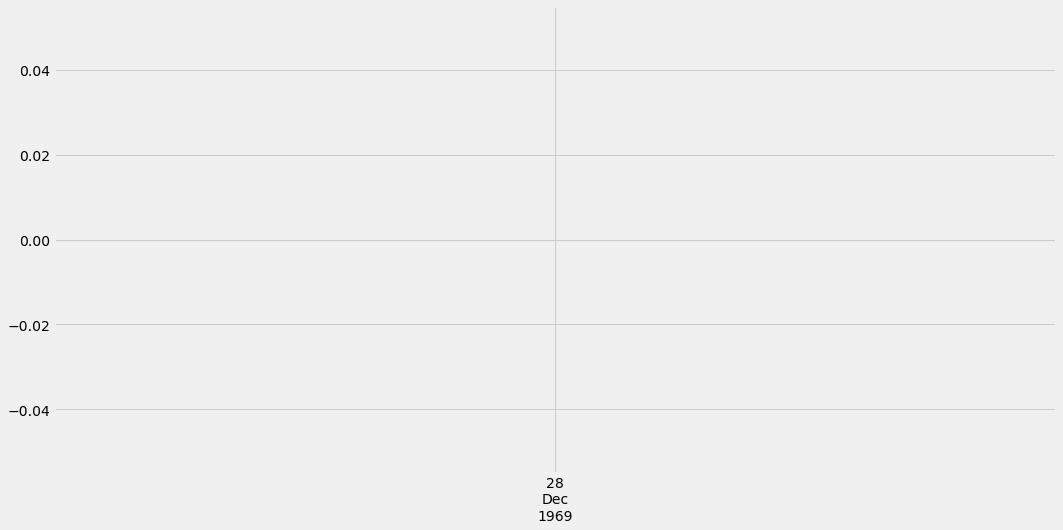

In [247]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_summary_df.plot(figsize=(16,8))
plt.title("Total Fare by City Type", fontsize=20)
plt.xlabel(" ")
plt.ylabel("Fare($USD)", fontsize=14)
plt.grid(True)
plt.legend(loc="best",title="City Types")

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/fig8")